In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.cluster import KMeans

<h1>2. Dataset Description</h1>

In [ ]:
loanData = pd.read_csv("https://raw.githubusercontent.com/ahmadeshtiak/Loan-Prediction-Model/refs/heads/main/Loan%20Approval%20Dataset.csv")
loanData

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561.0,No,1
1,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504.0,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635.0,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675.0,No,1
4,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000,MEDICAL,15.66,0.31,3,645.0,No,1
44996,37,female,Associate,65800.0,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11,621.0,No,1
44997,33,male,Associate,56942.0,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668.0,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000,EDUCATION,13.23,0.36,6,604.0,No,1


<h3>Feature Names and its Datatypes</3>

In [ ]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   44996 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    44998 non-null  float64
 12  previous_loan_defaults_on_file  

<h3>Numerical Features</h3>

In [ ]:
##Selecting numerical features
numerical_data = loanData.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 9 numerical features: 

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,44996.0,80313.064139,80414.300460,8000.00,47204.00,67047.00,95784.50,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,44998.0,632.609516,50.435596,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
numerical_data.var()

,0
person_age,3.654333e+01
person_income,6.466460e+09
person_emp_exp,3.676642e+01
loan_amnt,3.987779e+07
loan_int_rate,8.873299e+00
loan_percent_income,7.605987e-03
cb_person_cred_hist_length,1.505209e+01
credit_score,2.543749e+03
loan_status,1.728433e-01


Skew

In [ ]:
numerical_data.skew()

,0
person_age,2.548154
person_income,34.150344
person_emp_exp,2.594917
loan_amnt,1.179731
loan_int_rate,0.213784
loan_percent_income,1.034512
cb_person_cred_hist_length,1.631720
credit_score,-0.610290
loan_status,1.336351


<h3>Categorical Features</h3>

In [ ]:
#Selecting categoricalfeatures
categorical_data=loanData.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
person_gender,45000,2,male,24841
person_education,45000,5,Bachelor,13399
person_home_ownership,45000,4,RENT,23443
loan_intent,45000,6,EDUCATION,9153
previous_loan_defaults_on_file,45000,2,Yes,22858


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

person_gender                     2
person_education                  5
person_home_ownership             4
loan_intent                       6
previous_loan_defaults_on_file    2
dtype: int64


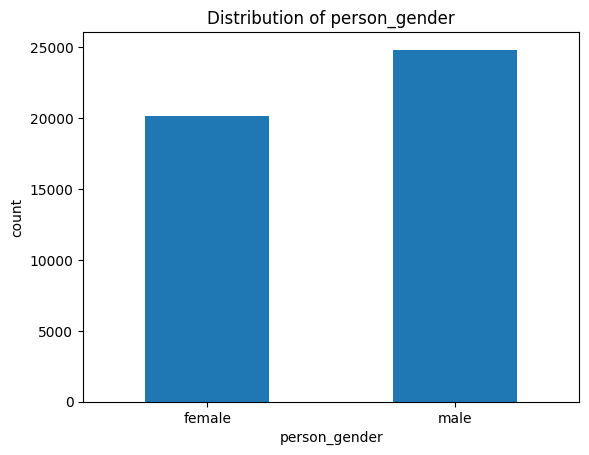

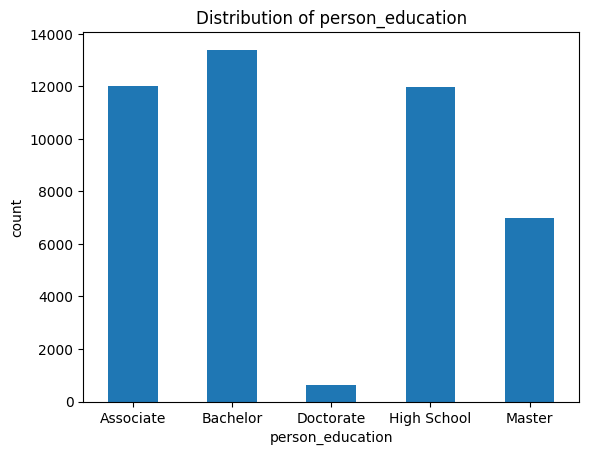

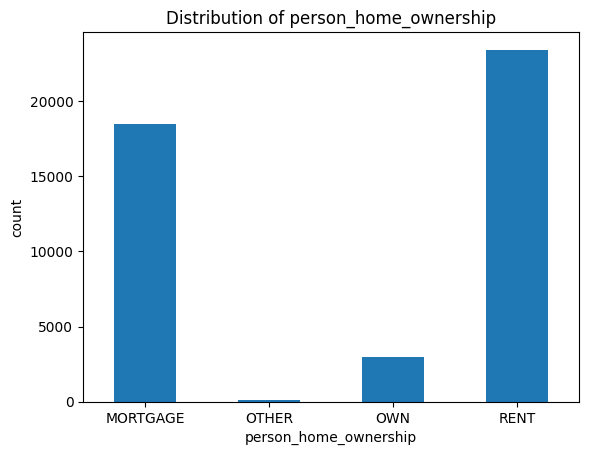

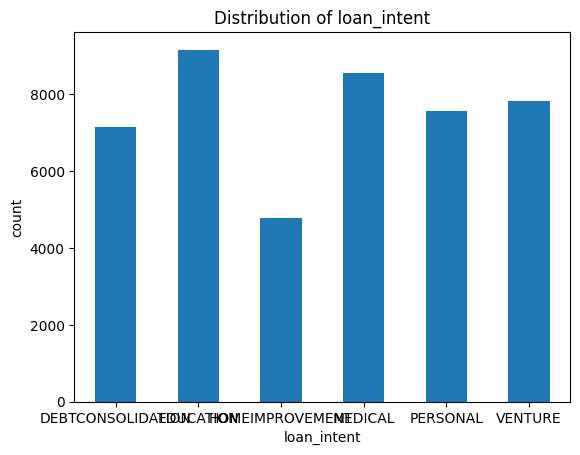

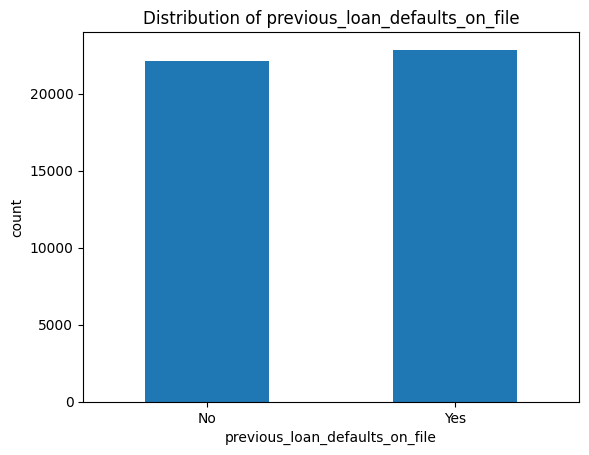

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

<h3>Histogram And Box Plot</h3>

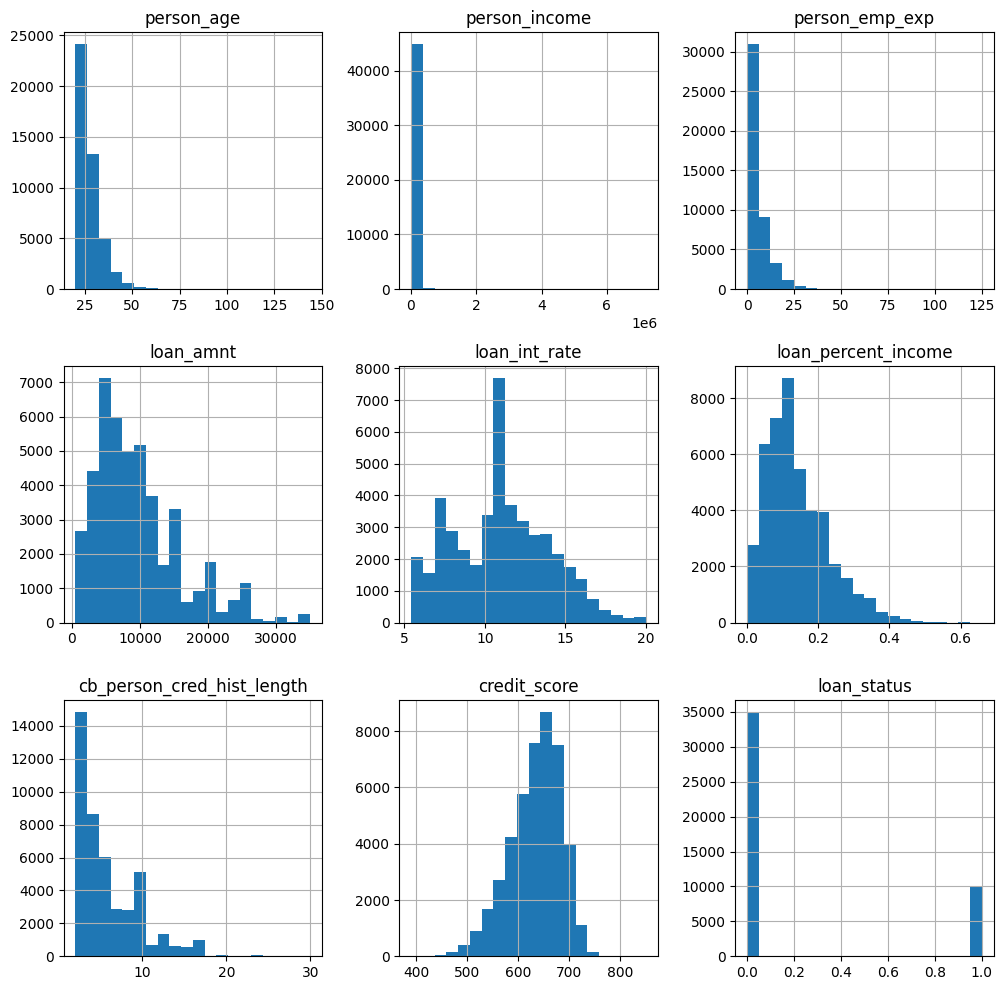

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

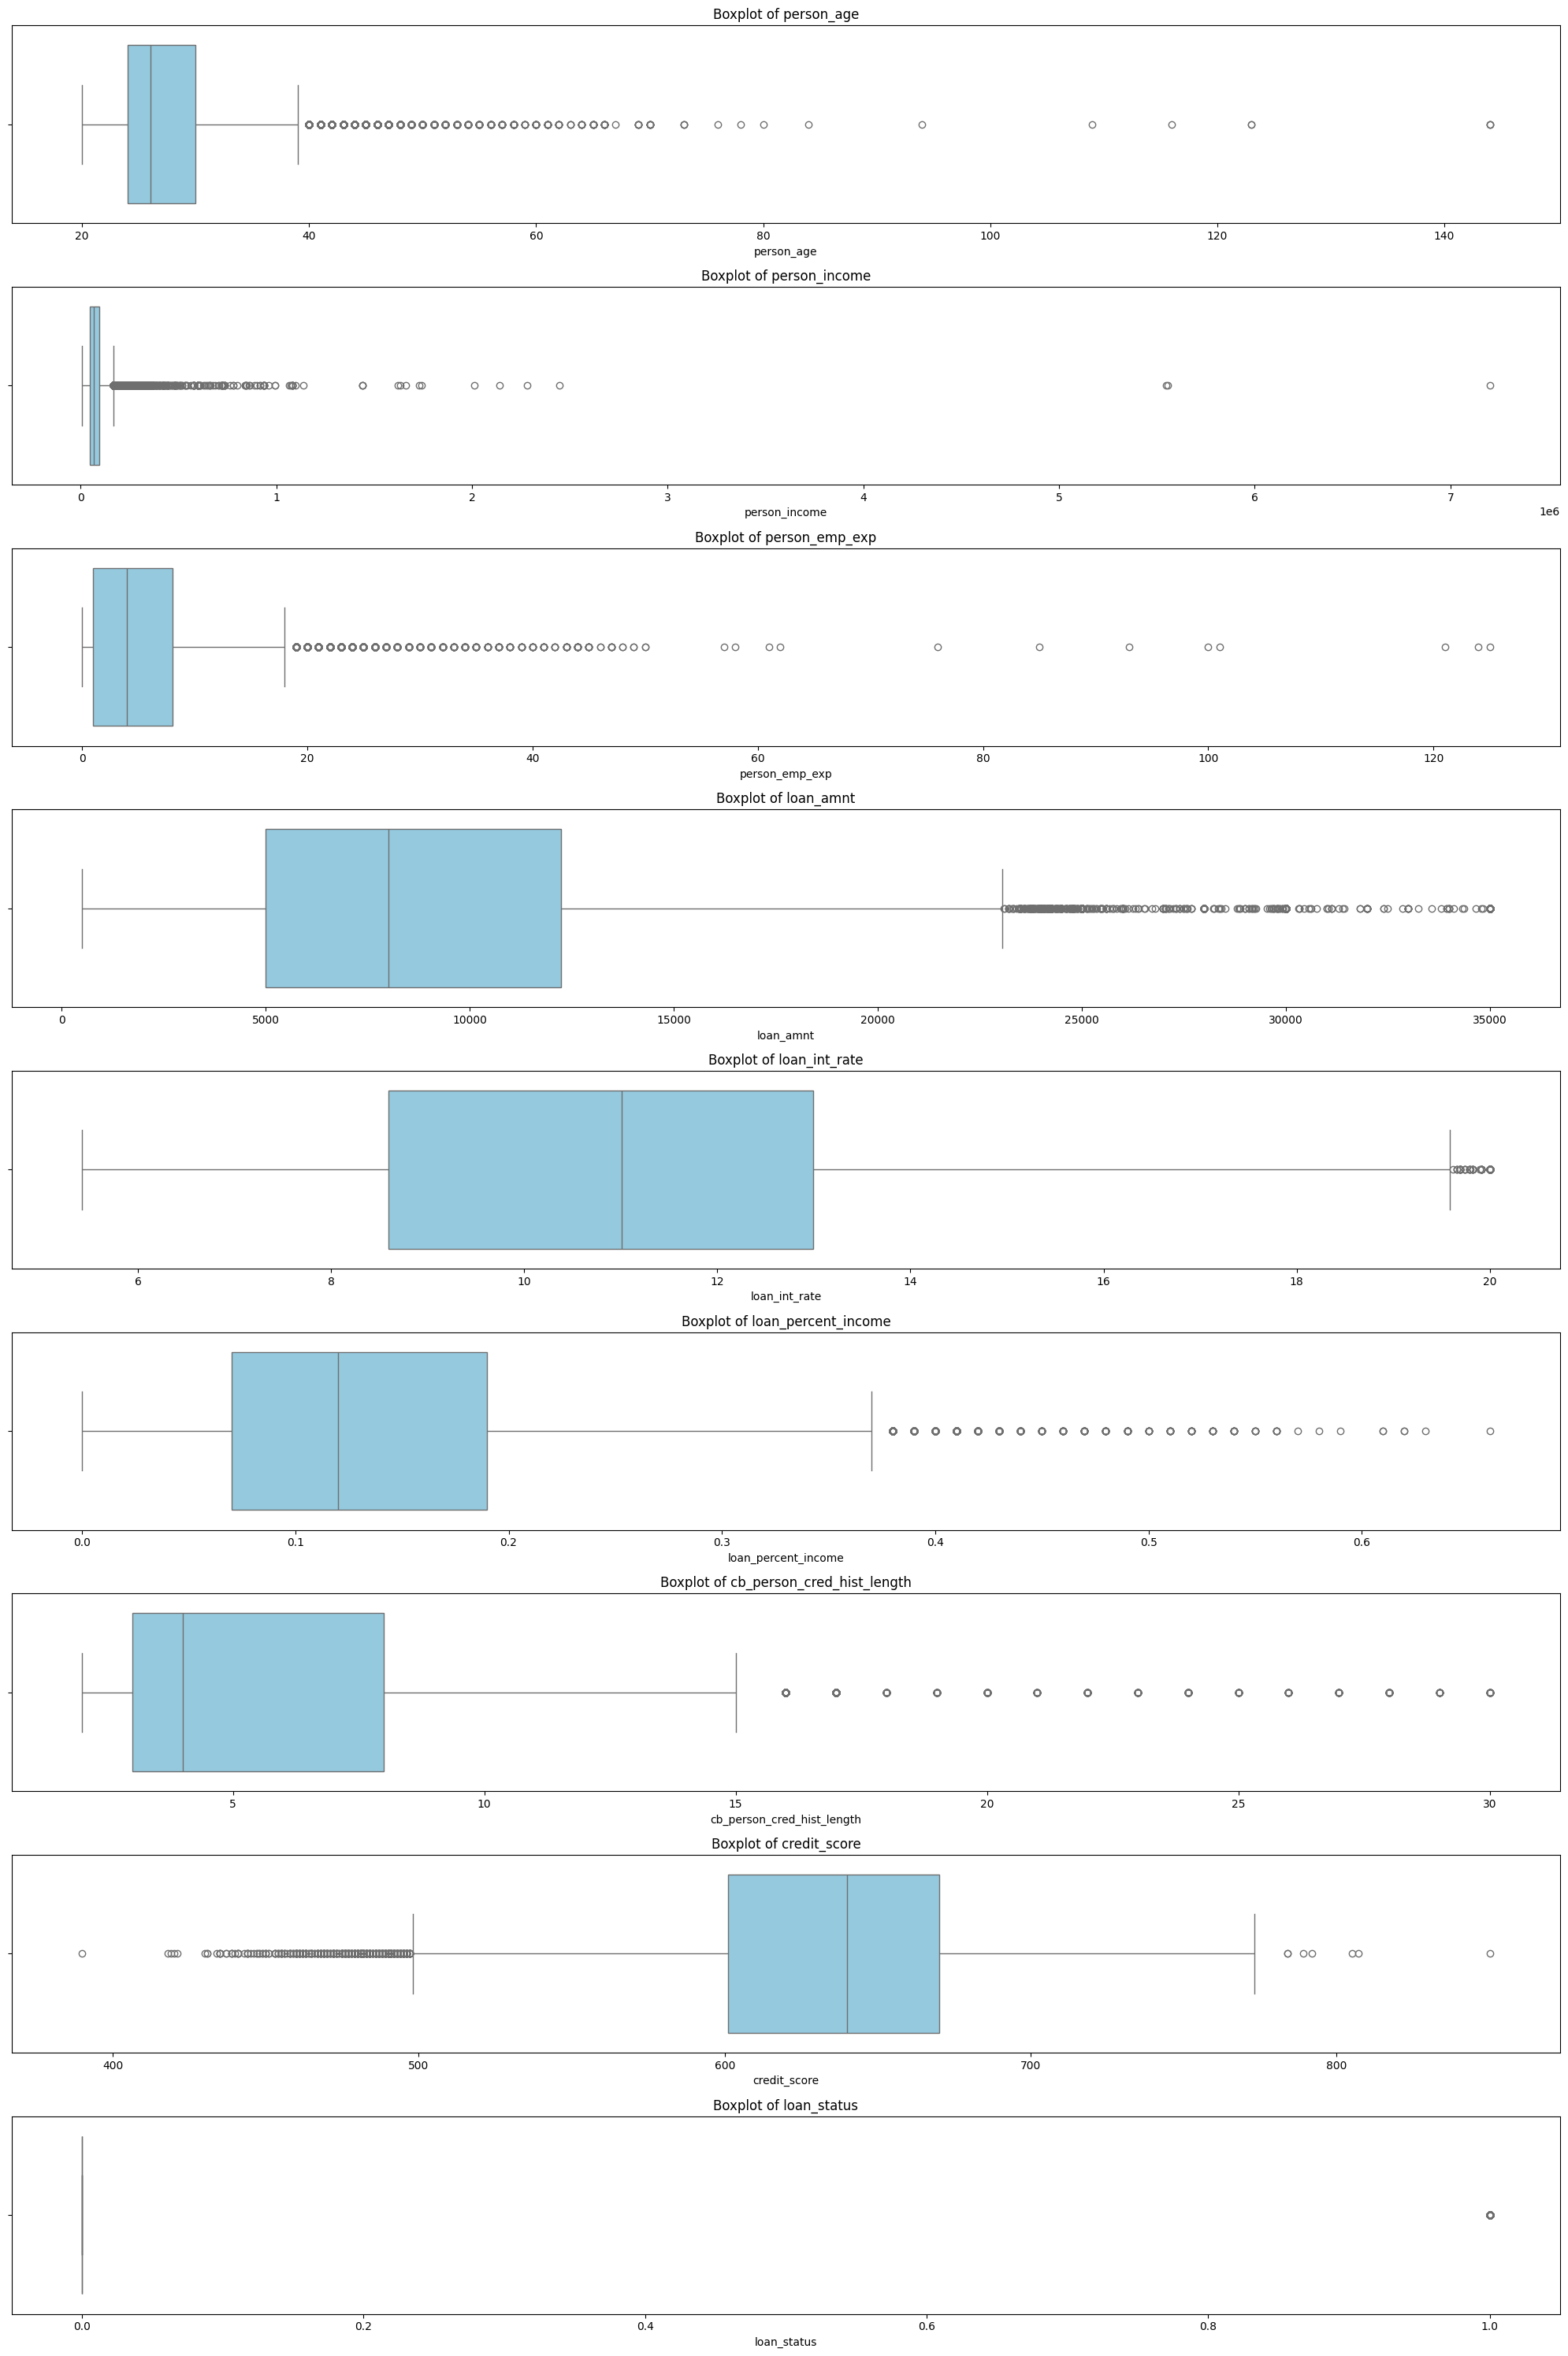

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = loanData.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=loanData[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

<h3>Correlation of the Features & Heatmap</h3>

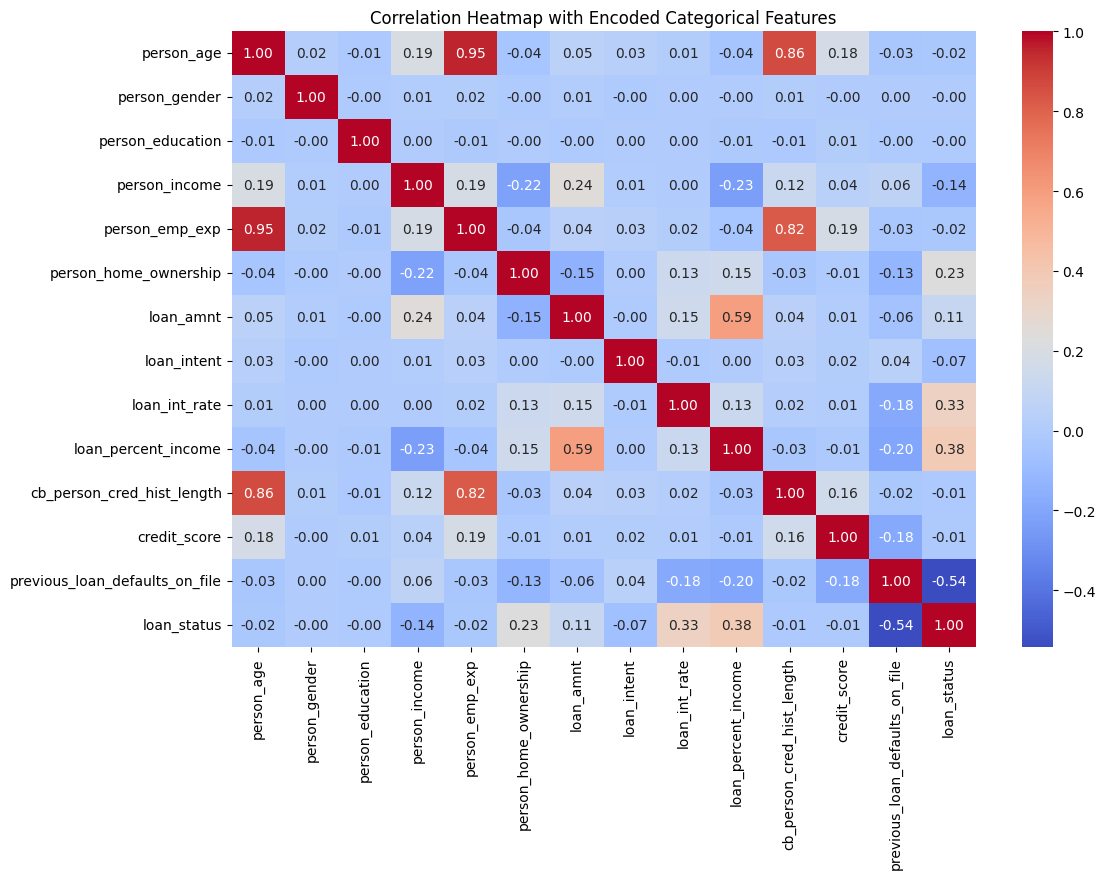

In [ ]:
# Encoding to get numerical values from categorical values
# Datatype object diye String type data bujhay, Cagegorical column arki
# astype('category') mane string ke category te convert kora
for col in loanData.select_dtypes(include=['object']).columns:
    loanData[col] = loanData[col].astype('category').cat.codes

corr_matrix = loanData.corr()

# Heatmap Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Encoded Categorical Features")
plt.show()

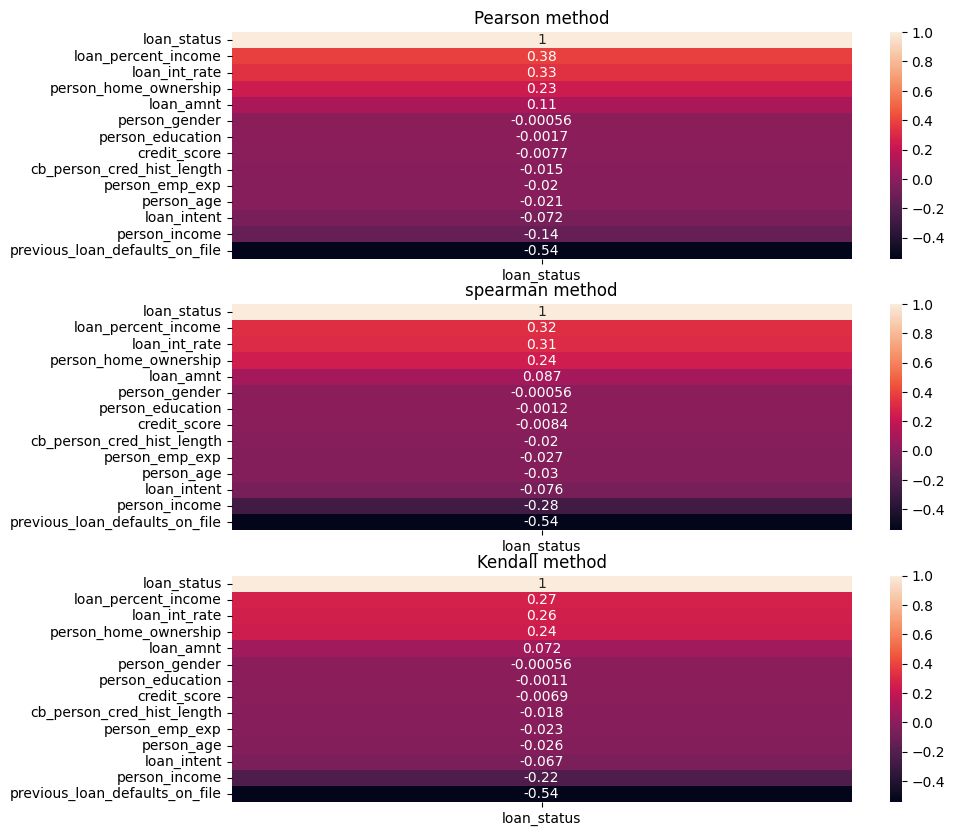

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = loanData.corr('pearson')[['loan_status']].sort_values(by='loan_status', ascending=False)
corr2 = loanData.corr('spearman')[['loan_status']].sort_values(by='loan_status', ascending=False)
corr3 = loanData.corr('kendall')[['loan_status']].sort_values(by='loan_status', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

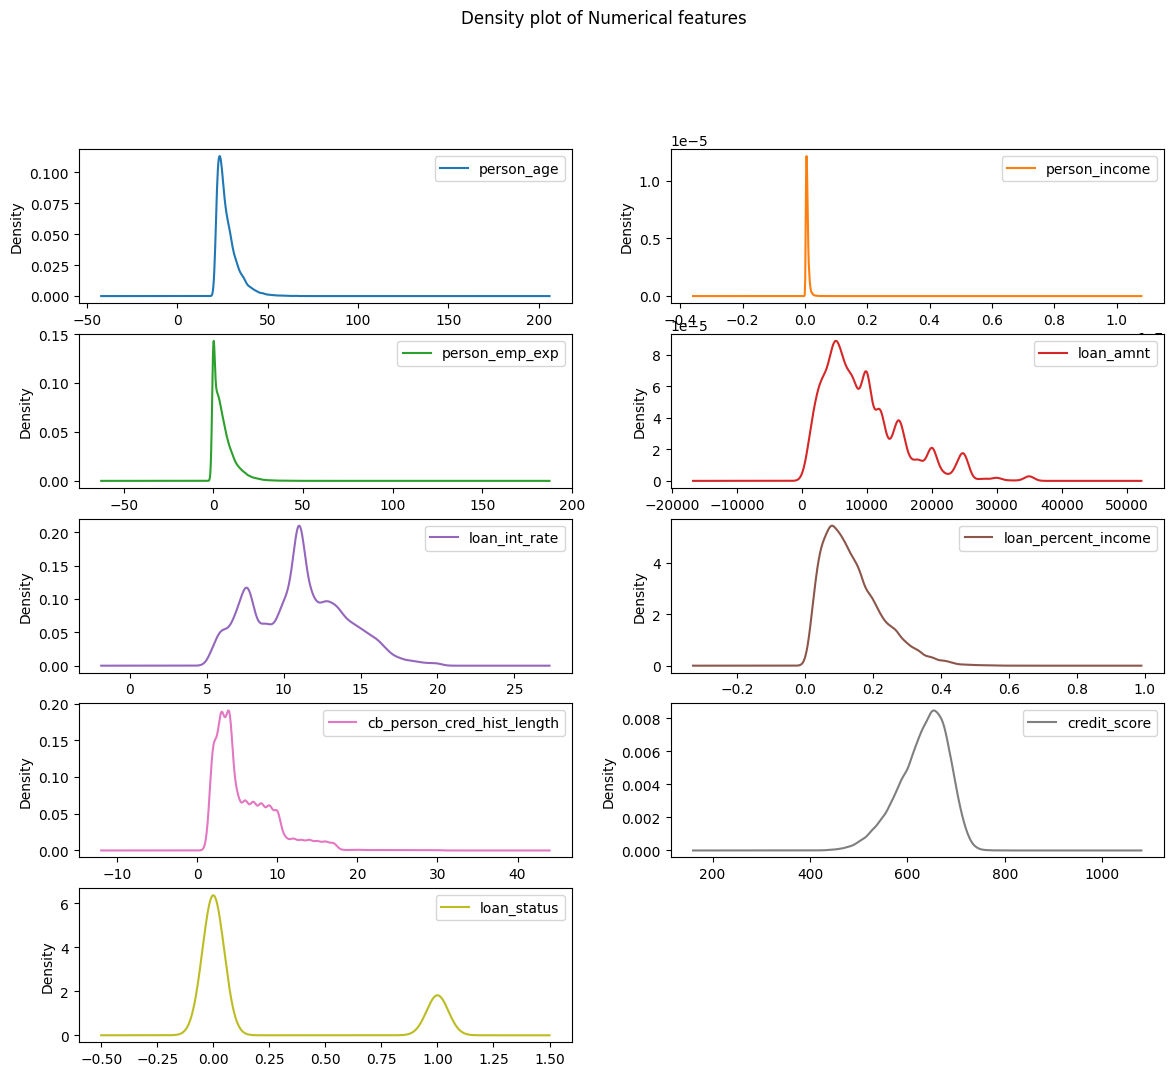

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

<h3>Checking for Imbalance</h3>

loan_status
0    35000
1    10000
Name: count, dtype: int64


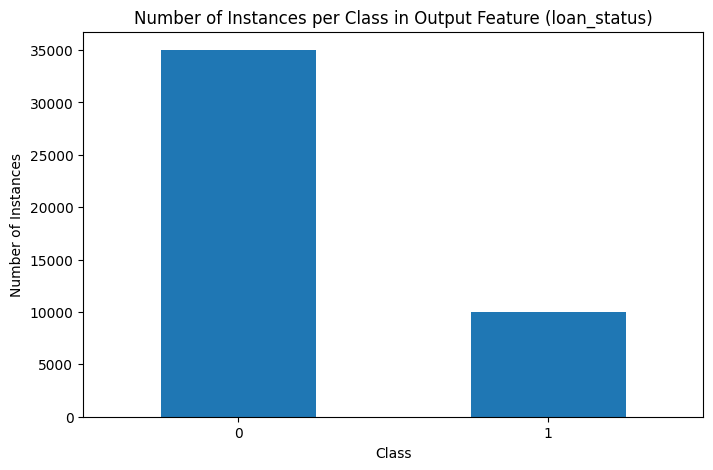

In [ ]:
# Count the number of instances for each class in the output column
class_counts = loanData[loanData.columns[13]].value_counts()

# Print the counts
print(class_counts)

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances per Class in Output Feature ({loanData.columns[13]})')
plt.xticks(rotation=0)
plt.show()

# 3. Dataset pre-processing

In [ ]:
loanData = pd.read_csv("https://raw.githubusercontent.com/ahmadeshtiak/Loan-Prediction-Model/refs/heads/main/Loan%20Approval%20Dataset.csv")
print(loanData.shape)
loanData.head()

(45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561.0,No,1
1,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504.0,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635.0,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675.0,No,1
4,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586.0,No,1


In [ ]:
loanData.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,4
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Handling Null/Missing values



In [ ]:
#Dropping rows
print("Shape of dataframe before dropping:", loanData.shape)
loanData = loanData.dropna(axis = 0, subset = ['credit_score'])

#Impute
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(loanData[['person_income']])
loanData['person_income'] = impute.transform(loanData[['person_income']])
print("Shape after dropping:", loanData.shape)

Shape of dataframe before dropping: (45000, 14)
Shape after dropping: (44998, 14)


In [ ]:
loanData.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Encoding Categorical Values






In [ ]:
#unique Categories for each categorical colums
print(loanData['person_gender'].unique())
print(loanData['person_education'].unique())
print(loanData['person_home_ownership'].unique())
print(loanData['loan_intent'].unique())
print(loanData['previous_loan_defaults_on_file'].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


In [ ]:
# Applying the encoding to the categorical columns and replacing with the originals
enc = LabelEncoder()

loanData['person_gender'] = enc.fit_transform(loanData['person_gender'])
loanData['person_education'] = enc.fit_transform(loanData['person_education'])
loanData['person_home_ownership'] = enc.fit_transform(loanData['person_home_ownership'])
loanData['loan_intent'] = enc.fit_transform(loanData['loan_intent'])
loanData['previous_loan_defaults_on_file'] = enc.fit_transform(loanData['previous_loan_defaults_on_file'])

loanData.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948.0,0,3,35000,4,16.02,0.49,3,561.0,0,1
1,21,0,3,12282.0,0,2,1000,1,11.14,0.08,2,504.0,1,0
2,25,0,3,12438.0,3,0,5500,3,12.87,0.44,3,635.0,0,1
3,23,0,1,79753.0,0,3,35000,3,15.23,0.44,2,675.0,0,1
4,24,1,4,66135.0,1,3,35000,3,14.27,0.53,4,586.0,0,1


Feature Scalling

In [ ]:
X = loanData.drop("loan_status", axis=1)
y = loanData["loan_status"]

# Identifying numerical columns for scaling
numerical_cols_after_encoding = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X[numerical_cols_after_encoding] = scaler.fit_transform(X[numerical_cols_after_encoding])

print("After Scaling of the features...")
X.head()

After Scaling of the features...


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-0.953542,-1.110074,1.525259,-0.103911,-0.892287,0.904777,4.024861,0.852895,1.683037,4.016401,-0.739135,-1.419837,-1.016040
1,-1.118964,-1.110074,0.849186,-0.846084,-0.892287,0.210558,-1.359187,-0.882906,0.044770,-0.684899,-0.996887,-2.550003,0.984213
2,-0.457276,-1.110074,0.849186,-0.844144,-0.397529,-1.177879,-0.646592,0.274295,0.625549,3.443072,-0.739135,0.047397,-1.016040
3,-0.788120,-1.110074,-0.502961,-0.006826,-0.892287,0.904777,4.024861,0.274295,1.417826,3.443072,-0.996887,0.840497,-1.016040
4,-0.622698,0.900841,1.525259,-0.176218,-0.727368,0.904777,4.024861,0.274295,1.095544,4.475065,-0.481383,-0.924150,-1.016040


# 4. Dataset Splitting
Using stratified method for dividing the datasets as the dataset is imbalanced

In [ ]:
# First split: Train + Validation vs Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)  # 80/20 split

# Second split: Train vs Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)  # 20% of 80% = 16% for validation
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (28798, 13)
Shape of X_test: (9000, 13)
Shape of y_train: (28798,)
Shape of y_test: (9000,)


# 5. Model Training and Testing
Supervised Learning Phase

In [ ]:
from sklearn.model_selection import GridSearchCV

model_results = {}

# Define models with their parameter grids
param_grids = {
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9, 11]}
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]}
    },
    "Neural Network (MLP)": {
        "model": MLPClassifier(random_state=42, max_iter=500),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (50,50)],
            "alpha": [0.0001, 0.001, 0.01],
            "learning_rate_init": [0.001, 0.01]
        }
    }
}

# Loop through models and tune using GridSearchCV
for name, config in param_grids.items():
    print(f"\nTuning hyperparameters for {name}...")

    grid = GridSearchCV(
        config["model"],
        config["params"],
        cv=5,                # 5-fold cross-validation on training data
        scoring="accuracy",  # metric for model selection
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid.best_estimator_

    # Validation score (from cross-validation)
    val_accuracy = grid.best_score_
    print(f"Best Params: {grid.best_params_}")
    print(f"Validation Accuracy (CV): {val_accuracy:.4f}")

    # Test set evaluation
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Save results
    model_results[name] = {
        "Best Params": grid.best_params_,
        "Validation Accuracy": val_accuracy,
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ConfusionMatrix": cm,
        "AUC": roc_auc,
        "ROC": (fpr, tpr, thresholds) if roc_auc is not None else None
    }

print("Hyperparameter tuning and evaluation completed successfully!")



Tuning hyperparameters for K-Nearest Neighbors...
Best Params: {'n_neighbors': 11}
Validation Accuracy (CV): 0.8929

Tuning hyperparameters for Logistic Regression...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy (CV): 0.8901

Tuning hyperparameters for Neural Network (MLP)...
Best Params: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Validation Accuracy (CV): 0.9144
Hyperparameter tuning and evaluation completed successfully!


Unsupervised Learning Phase

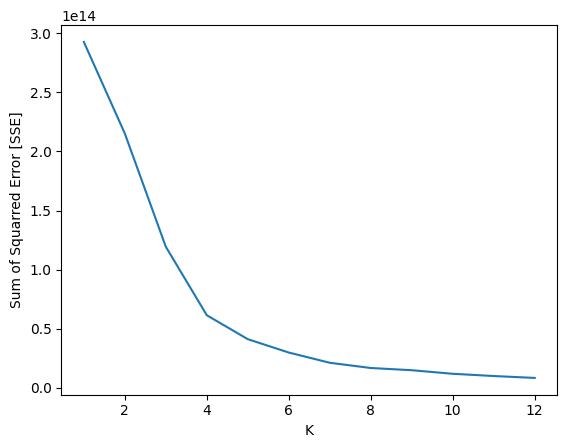

In [ ]:
#Finding the best number of clusters using elbow method
k_range = range(1,13)
SSE = []
for k in k_range:
  km = KMeans(n_clusters= k)
  km.fit(loanData[['loan_amnt','person_income']])
  SSE.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("Sum of Squarred Error [SSE]")
plt.plot(k_range,SSE)

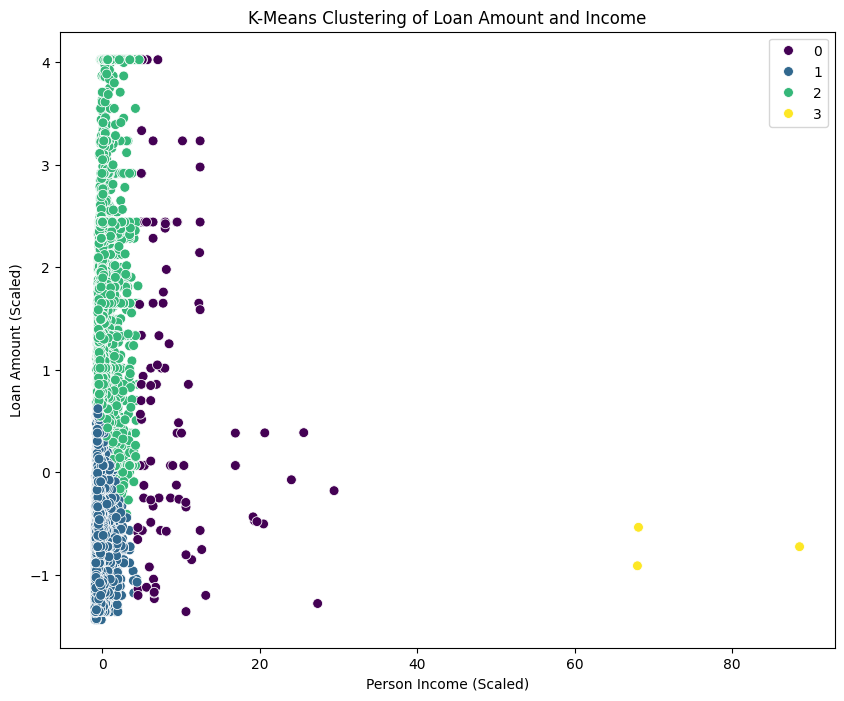

The K-Means algorithm has successfully clustered the data into two distinct groups, which likely correspond to the approved and not-approved loan statuses.


In [ ]:
# Applying KMeans with 4 clusters as the elbow point is 4 here
kmeans_df = X[["loan_amnt", "person_income"]]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(kmeans_df)
# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=kmeans_df["person_income"],
    y=kmeans_df["loan_amnt"],
    hue=kmeans_labels,
    palette="viridis",
    s=50,
)
plt.title("K-Means Clustering of Loan Amount and Income")
plt.xlabel("Person Income (Scaled)")
plt.ylabel("Loan Amount (Scaled)")
plt.show()
print("The K-Means algorithm has successfully clustered the data into two distinct groups, which likely correspond to the approved and not-approved loan statuses.")


# 6. Model selection/Comparison analysis
Bar chart showcasing prediction accuracy


--- Model Selection/Comparison Analysis ---
                                                            Best Params  \
K-Nearest Neighbors                                 {'n_neighbors': 11}   
Logistic Regression     {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}   
Neural Network (MLP)  {'alpha': 0.0001, 'hidden_layer_sizes': (50,),...   

                     Validation Accuracy Test Accuracy Precision  Recall  \
K-Nearest Neighbors             0.892909      0.899333  0.806958   0.719   
Logistic Regression             0.890062      0.897444  0.785676  0.7405   
Neural Network (MLP)            0.914404      0.913889  0.809813  0.8005   

                            F1             ConfusionMatrix       AUC  \
K-Nearest Neighbors   0.760444  [[6656, 344], [562, 1438]]  0.945418   
Logistic Regression    0.76242  [[6596, 404], [519, 1481]]  0.950102   
Neural Network (MLP)  0.805129  [[6624, 376], [399, 1601]]  0.965057   

                                                            

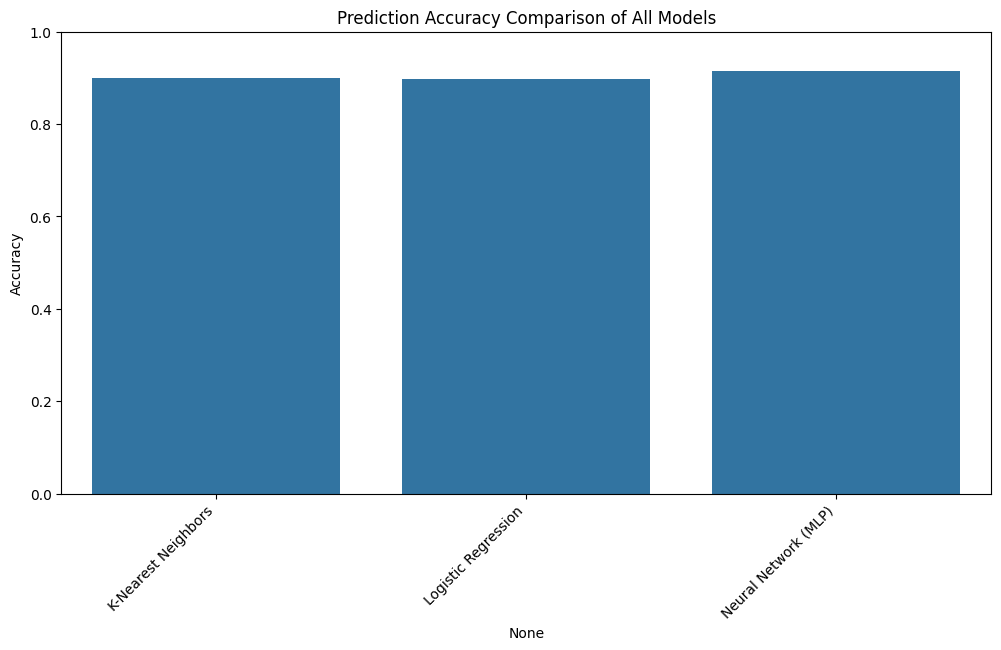

In [ ]:
print("\n--- Model Selection/Comparison Analysis ---")
results_df = pd.DataFrame(model_results).T
print(results_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y="Test Accuracy", data=results_df)
plt.title("Prediction Accuracy Comparison of All Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()

Bar chart for precision and recall comparison

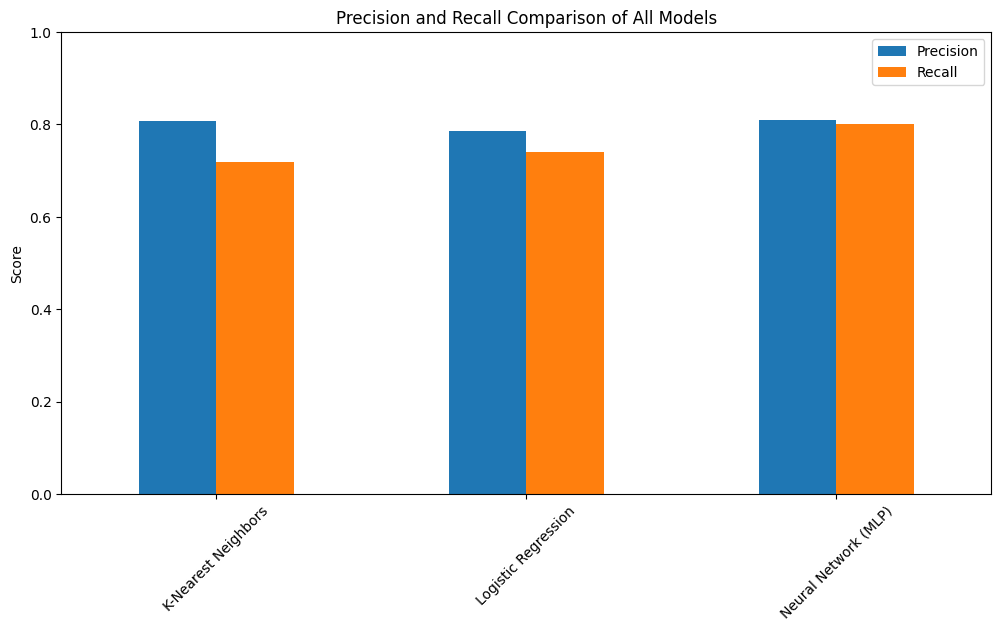

In [ ]:
results_df[["Precision", "Recall"]].plot(
    kind="bar", figsize=(12, 6), rot=45, ylim=(0, 1)
)
plt.title("Precision and Recall Comparison of All Models")
plt.ylabel("Score")
plt.show()

Confusion Matrices

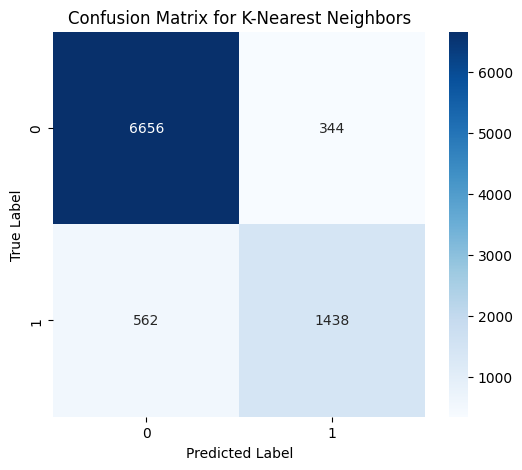

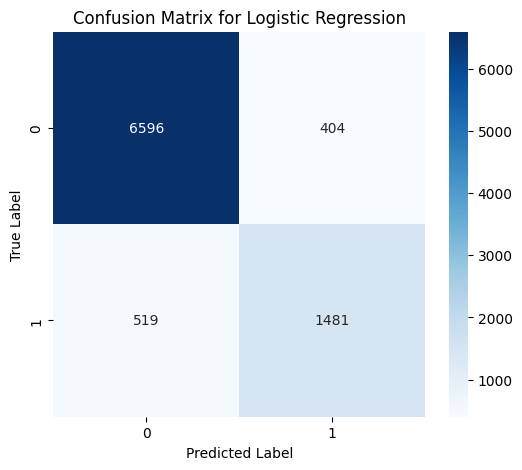

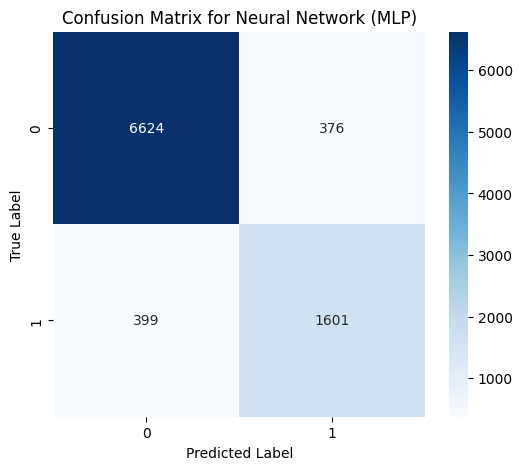

In [ ]:
for model in model_results:
  con = model_results[model]["ConfusionMatrix"]
  plt.figure(figsize=(6, 5))
  sns.heatmap(con, annot=True, fmt="d", cmap="Blues")
  plt.title(f"Confusion Matrix for {model}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

AUC score and ROC curve

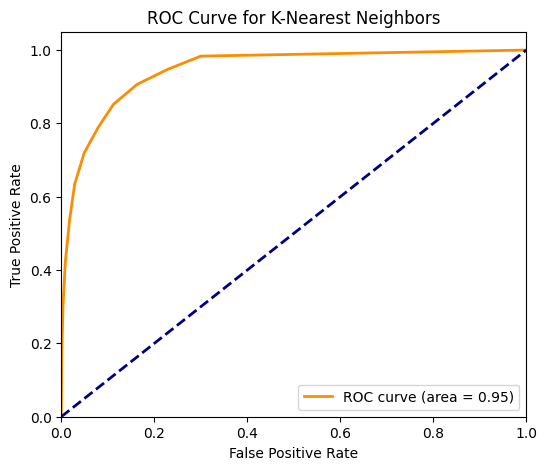

AUC Score: 0.9454


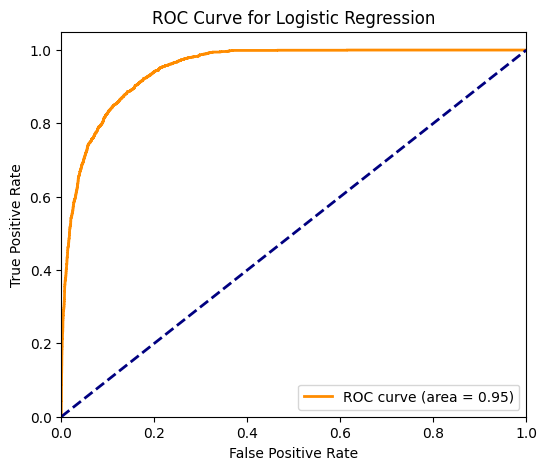

AUC Score: 0.9501


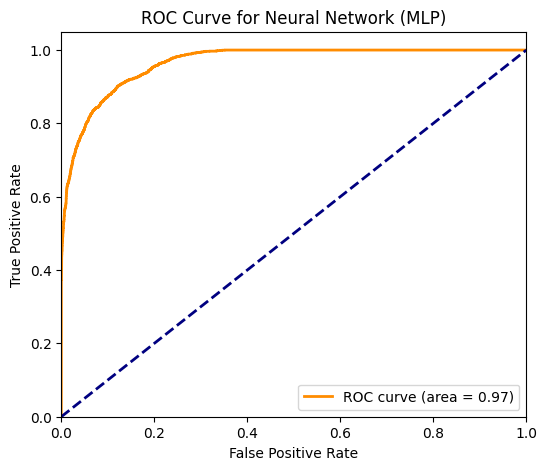

AUC Score: 0.9651


In [ ]:
for model in model_results:
  roc = model_results[model]["ROC"]
  roc_auc = model_results[model]["AUC"]
  plt.figure(figsize=(6, 5))
  plt.plot(roc[0], roc[1], color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
  plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"ROC Curve for {model}")
  plt.legend(loc="lower right")
  plt.show()
  print(f"AUC Score: {roc_auc:.4f}")

In [ ]:
print("Overall neural network is ahead of performance than other models here")

Overall neural network is ahead of performance than other models here
